# ノック41 : データ読み込みと整形

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

customer = pd.read_csv('customer_join.csv')
uselog_months = pd.read_csv('use_log_months.csv')

In [2]:
# extract visit last and this month
year_months = list(uselog_months['年月'].unique())
year_months

[201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903]

In [3]:
uselog = pd.DataFrame()
for i in range(1, len(year_months)):
    tmp = uselog_months.loc[uselog_months['年月'] == year_months[i]]
    tmp.rename(columns={'count' : 'count_0'}, inplace = True)
    tmp_before = uselog_months.loc[uselog_months['年月'] == year_months[i-1]]
    # NOTE:
    ## in this code, year_months was not sorted because original csv data was already sorted.
    ## if the original data was not sorted, year_months[i-1] did not mean the month before always. Be careful.
    del tmp_before['年月']
    tmp_before.rename(columns = {'count' : 'count_1'}, inplace = True)
    tmp = pd.merge(tmp, tmp_before, on = 'customer_id', how = 'left')
    uselog = pd.concat([uselog, tmp], ignore_index = True)
uselog.head()

,年月,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0


# ノック42 : 退会前月のデータを作成

In [4]:
from dateutil.relativedelta import relativedelta

exit_customer = customer.loc[customer['is_deleted'] == 1]  # extract deleted customer
exit_customer ['exit_date'] = None                         # add columns to store exit date
exit_customer['end_date'] = pd.to_datetime(exit_customer['end_date'])  # convert end date to datetime format

In [5]:
print(len(exit_customer))
print(exit_customer)

1350
     customer_id    name class gender  start_date   end_date campaign_id  \
708     TS511179  XXXXXX   C01      F  2016-05-01 2018-04-30         CA1   
729     TS443736    XXXX   C02      M  2016-05-01 2018-04-30         CA1   
730     HD542886      XX   C01      M  2016-05-01 2018-04-30         CA1   
770     HD597545   XXXXX   C03      F  2016-06-01 2018-05-31         CA1   
785     HI749296   XXXXX   C01      M  2016-06-01 2018-05-31         CA1   
...          ...     ...   ...    ...         ...        ...         ...   
4049    OA143589   XXXXX   C03      F  2019-01-15 2019-02-28         CA1   
4050    GD367382    XXXX   C01      M  2019-01-15 2019-03-31         CA1   
4068    OA034442   XXXXX   C02      M  2019-02-05 2019-03-31         CA1   
4086    PL508278   XXXXX   C03      M  2019-02-09 2019-03-31         CA1   
4099    HD565792     XXX   C01      F  2019-02-11 2019-03-31         CA1   

      is_deleted class_name  price campaign_name  mean  median  max  min  \
708   

In [8]:
for i in range(len(exit_customer)):
    exit_customer['exit_date'].iloc[i] = exit_customer['end_date'].iloc[i] - relativedelta(months=1)
print(exit_customer.isnull().sum())
print(exit_customer.head())
print(exit_customer['exit_date'])

customer_id          0
name                 0
class                0
gender               0
start_date           0
end_date             0
campaign_id          0
is_deleted           0
class_name           0
price                0
campaign_name        0
mean                 0
median               0
max                  0
min                  0
routine_flg          0
calc_date            0
membership_period    0
exit_date            0
dtype: int64
    customer_id    name class gender  start_date   end_date campaign_id  \
708    TS511179  XXXXXX   C01      F  2016-05-01 2018-04-30         CA1   
729    TS443736    XXXX   C02      M  2016-05-01 2018-04-30         CA1   
730    HD542886      XX   C01      M  2016-05-01 2018-04-30         CA1   
770    HD597545   XXXXX   C03      F  2016-06-01 2018-05-31         CA1   
785    HI749296   XXXXX   C01      M  2016-06-01 2018-05-31         CA1   

     is_deleted class_name  price campaign_name  mean  median  max  min  \
708           1     オールタ

In [10]:
exit_customer['exit_date'] = pd.to_datetime(exit_customer['exit_date'])
exit_customer['年月'] = exit_customer['exit_date'].dt.strftime('%Y%m')
uselog['年月'] = uselog['年月'].astype(str)
exit_uselog = pd.merge(uselog, exit_customer, on = ['customer_id', '年月'], how = 'left')
    
print(len(uselog))
exit_uselog.head()

33851


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [11]:
exit_uselog = exit_uselog.dropna(subset = ['name'])
print(len(exit_uselog))
print(len(exit_uselog['customer_id'].unique()))
exit_uselog.head()

1104
1104


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,...,10500.0,通常,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,2018-05-30
57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,...,10500.0,通常,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,2018-05-30
110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,...,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,2018-05-30
128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,...,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,2018-05-30
147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,...,6000.0,通常,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,2018-05-30


# ノック43 : 継続顧客のデータ作成

In [14]:
conti_customer = customer.loc[customer['is_deleted'] == 0]
conti_uselog = pd.merge(uselog, conti_customer, on = ['customer_id'], how = 'left')
print(len(conti_customer))
conti_uselog = conti_uselog.dropna(subset = ['name'])
print(len(conti_uselog))

2842
27422


In [17]:
conti_uselog = conti_uselog.sample(frac = 1).reset_index(drop = True)
conti_uselog = conti_uselog.drop_duplicates(subset = 'customer_id')
print(len(conti_uselog))
conti_uselog.head()

2842


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201807,OA602580,6,5.0,XX,C01,F,2016-06-01,NaN,CA1,...,オールタイム,10500.0,通常,5.083333,5.0,7.0,2.0,1.0,2019-04-30,34.0
1,201812,AS622023,6,4.0,XXX,C01,M,2016-06-01,NaN,CA1,...,オールタイム,10500.0,通常,5.000000,5.0,9.0,3.0,1.0,2019-04-30,34.0
2,201811,TS093380,5,6.0,XXX,C01,F,2017-11-01,NaN,CA1,...,オールタイム,10500.0,通常,6.583333,6.0,10.0,3.0,1.0,2019-04-30,17.0
3,201902,IK250551,5,7.0,XXXXX,C01,M,2017-02-01,NaN,CA1,...,オールタイム,10500.0,通常,6.000000,6.5,8.0,2.0,1.0,2019-04-30,26.0
4,201811,AS732240,5,7.0,XXXXX,C02,F,2015-05-01,NaN,CA1,...,デイタイム,7500.0,通常,4.666667,5.0,7.0,2.0,1.0,2019-04-30,47.0


In [50]:
# another way
conti_customer = customer.loc[customer['is_deleted'] == 0]
conti_uselog = pd.merge(uselog, conti_customer, on = ['customer_id'], how = 'left')
conti_uselog = conti_uselog.dropna(subset = ['name'])
print(len(conti_uselog))
conti_uselog = conti_uselog.groupby('customer_id').sample(n=1).reset_index(drop = True)
print(len(conti_uselog))
conti_uselog.head()

27422
2842


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201807,AS002855,5,5.0,XXXX,C03,F,2016-11-01,NaN,CA1,...,ナイト,6000.0,通常,4.500000,5.0,7.0,2.0,1.0,2019-04-30,29.0
1,201807,AS009373,7,4.0,XX,C01,F,2015-11-01,NaN,CA1,...,オールタイム,10500.0,通常,5.083333,5.0,7.0,3.0,1.0,2019-04-30,41.0
2,201809,AS015233,9,11.0,XXXXX,C01,M,2018-05-13,NaN,CA2,...,オールタイム,10500.0,入会費半額,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0
3,201805,AS015315,3,6.0,XXXXX,C01,M,2015-07-01,NaN,CA1,...,オールタイム,10500.0,通常,4.833333,5.0,7.0,3.0,1.0,2019-04-30,45.0
4,201901,AS015739,5,4.0,XXXXX,C03,M,2017-06-01,NaN,CA1,...,ナイト,6000.0,通常,5.583333,5.5,8.0,4.0,1.0,2019-04-30,22.0


In [57]:
predict_data = pd.concat([conti_uselog, exit_uselog], ignore_index = True)
print(len(predict_data))
predict_data.head()

3946


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201807,AS002855,5,5.0,XXXX,C03,F,2016-11-01,NaN,CA1,...,6000.0,通常,4.500000,5.0,7.0,2.0,1.0,2019-04-30,29.0,NaT
1,201807,AS009373,7,4.0,XX,C01,F,2015-11-01,NaN,CA1,...,10500.0,通常,5.083333,5.0,7.0,3.0,1.0,2019-04-30,41.0,NaT
2,201809,AS015233,9,11.0,XXXXX,C01,M,2018-05-13,NaN,CA2,...,10500.0,入会費半額,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0,NaT
3,201805,AS015315,3,6.0,XXXXX,C01,M,2015-07-01,NaN,CA1,...,10500.0,通常,4.833333,5.0,7.0,3.0,1.0,2019-04-30,45.0,NaT
4,201901,AS015739,5,4.0,XXXXX,C03,M,2017-06-01,NaN,CA1,...,6000.0,通常,5.583333,5.5,8.0,4.0,1.0,2019-04-30,22.0,NaT


# ノック44 : 在籍期間を作成

In [58]:
predict_data['period'] = 0
predict_data['now_date'] = pd.to_datetime(predict_data['年月'], format = '%Y%m')
predict_data['start_date'] = pd.to_datetime(predict_data['start_date'])

for i in range(len(predict_data)):
    delta = relativedelta(predict_data['now_date'][i], predict_data['start_date'][i])
    predict_data['period'][i] = int(delta.years * 12 + delta.months)
predict_data.head()

,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,period,now_date
0,201807,AS002855,5,5.0,XXXX,C03,F,2016-11-01,NaN,CA1,...,4.500000,5.0,7.0,2.0,1.0,2019-04-30,29.0,NaT,20,2018-07-01
1,201807,AS009373,7,4.0,XX,C01,F,2015-11-01,NaN,CA1,...,5.083333,5.0,7.0,3.0,1.0,2019-04-30,41.0,NaT,32,2018-07-01
2,201809,AS015233,9,11.0,XXXXX,C01,M,2018-05-13,NaN,CA2,...,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0,NaT,3,2018-09-01
3,201805,AS015315,3,6.0,XXXXX,C01,M,2015-07-01,NaN,CA1,...,4.833333,5.0,7.0,3.0,1.0,2019-04-30,45.0,NaT,34,2018-05-01
4,201901,AS015739,5,4.0,XXXXX,C03,M,2017-06-01,NaN,CA1,...,5.583333,5.5,8.0,4.0,1.0,2019-04-30,22.0,NaT,19,2019-01-01


# ノック45 : 欠測値の処理

In [59]:
predict_data.isna().sum()

年月                      0
customer_id             0
count_0                 0
count_1               258
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2842
period                  0
now_date                0
dtype: int64

In [60]:
predict_data = predict_data.dropna(subset = ['count_1'])
predict_data.isna().sum()

年月                      0
customer_id             0
count_0                 0
count_1                 0
name                    0
class                   0
gender                  0
start_date              0
end_date             2636
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2636
period                  0
now_date                0
dtype: int64

# ノック46 : 文字型変数をダミー変数に変換

In [61]:
target_col = ['campaign_name', 'class_name', 'gender', 'count_1', 'routine_flg', 'period', 'is_deleted']
predict_data = predict_data[target_col]
predict_data.head()

,campaign_name,class_name,gender,count_1,routine_flg,period,is_deleted
0,通常,ナイト,F,5.0,1.0,20,0.0
1,通常,オールタイム,F,4.0,1.0,32,0.0
2,入会費半額,オールタイム,M,11.0,1.0,3,0.0
3,通常,オールタイム,M,6.0,1.0,34,0.0
4,通常,ナイト,M,4.0,1.0,19,0.0


In [62]:
predict_data = pd.get_dummies(predict_data)
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,campaign_name_通常,class_name_オールタイム,class_name_デイタイム,class_name_ナイト,gender_F,gender_M
0,5.0,1.0,20,0.0,0,0,1,0,0,1,1,0
1,4.0,1.0,32,0.0,0,0,1,1,0,0,1,0
2,11.0,1.0,3,0.0,1,0,0,1,0,0,0,1
3,6.0,1.0,34,0.0,0,0,1,1,0,0,0,1
4,4.0,1.0,19,0.0,0,0,1,0,0,1,0,1


In [63]:
del predict_data['campaign_name_通常']
del predict_data['class_name_ナイト']
del predict_data['gender_M']
predict_data.head()

# or use 'drop_first' in dummies method

,count_1,routine_flg,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,class_name_オールタイム,class_name_デイタイム,gender_F
0,5.0,1.0,20,0.0,0,0,0,0,1
1,4.0,1.0,32,0.0,0,0,1,0,1
2,11.0,1.0,3,0.0,1,0,1,0,0
3,6.0,1.0,34,0.0,0,0,1,0,0
4,4.0,1.0,19,0.0,0,0,0,0,0


# ノック47 : 決定木による予測モデル

In [65]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection

exit = predict_data.loc[predict_data['is_deleted'] == 1]
conti = predict_data.loc[predict_data['is_deleted'] == 0].sample(len(exit))

X = pd.concat([exit, conti], ignore_index = True)
y = X['is_deleted']
del X['is_deleted']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(y_test_pred)

[1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.

In [66]:
results_test = pd.DataFrame({'y_test':y_test, 'y_pred':y_test_pred})
results_test.head()

,y_test,y_pred
391,1.0,1.0
592,1.0,1.0
89,1.0,1.0
869,1.0,1.0
704,1.0,1.0


# ノック48 : チューニング

In [129]:
correct = len(results_test.loc[results_test['y_test'] == results_test['y_pred']])
data_count = len(results_test)
score_test = correct / data_count
print(score_test)

0.870722433460076


In [130]:
# or easier way
import numpy as np
miss_count = np.abs(results_test['y_pred'] - results_test['y_test']).sum()
miss_rate = 1 - (miss_count / len(results_test))
miss_rate

0.870722433460076

In [131]:
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.9334600760456274
0.9271229404309252


In [132]:
X = pd.concat([exit, conti], ignore_index = True)
y = X['is_deleted']
del X['is_deleted']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

model = DecisionTreeClassifier(random_state = 0, max_depth = 5)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.9372623574144486
0.9252217997465145


# ノック48.2 : グリッドサーチでパラメータチューニング

In [97]:
%%time
from tqdm import tqdm
import scipy.stats
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score

Wall time: 0 ns


In [105]:
X = pd.concat([exit, conti], ignore_index = True)
y = X['is_deleted']
del X['is_deleted']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

In [106]:
#条件設定
max_score = 0
SearchMethod = 0
DTC_grid = {DecisionTreeClassifier(): {"criterion": ["gini", "entropy"],
                                       "splitter": ["best", "random"],
                                       "max_depth": [i for i in range(1, 11)]
                                      }}

In [107]:
#決定木の実行
for model, param in tqdm(DTC_grid.items()):
    clf = GridSearchCV(model, param)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = f1_score(y_test, y_pred, average="micro")

    if max_score < score:
        max_score = score
        best_param = clf.best_params_
        best_model = model.__class__.__name__

print("ベストスコア:{}".format(max_score))
print("モデル:{}".format(best_model))
print("パラメーター:{}".format(best_param))

100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

ベストスコア:0.9163498098859315
モデル:DecisionTreeClassifier
パラメーター:{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}


# ノック49 : 寄与している変数を確認

In [110]:
importance = pd.DataFrame({'feature_names' : X.columns, 'coefficient' : model.feature_importances_})
importance

,feature_names,coefficient
0,count_1,0.352568
1,routine_flg,0.127609
2,period,0.519720
3,campaign_name_入会費半額,0.000000
4,campaign_name_入会費無料,0.000000
5,class_name_オールタイム,0.000000
6,class_name_デイタイム,0.000103
7,gender_F,0.000000


In [115]:
# additional : visualize tree
## by graphviz
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn import tree

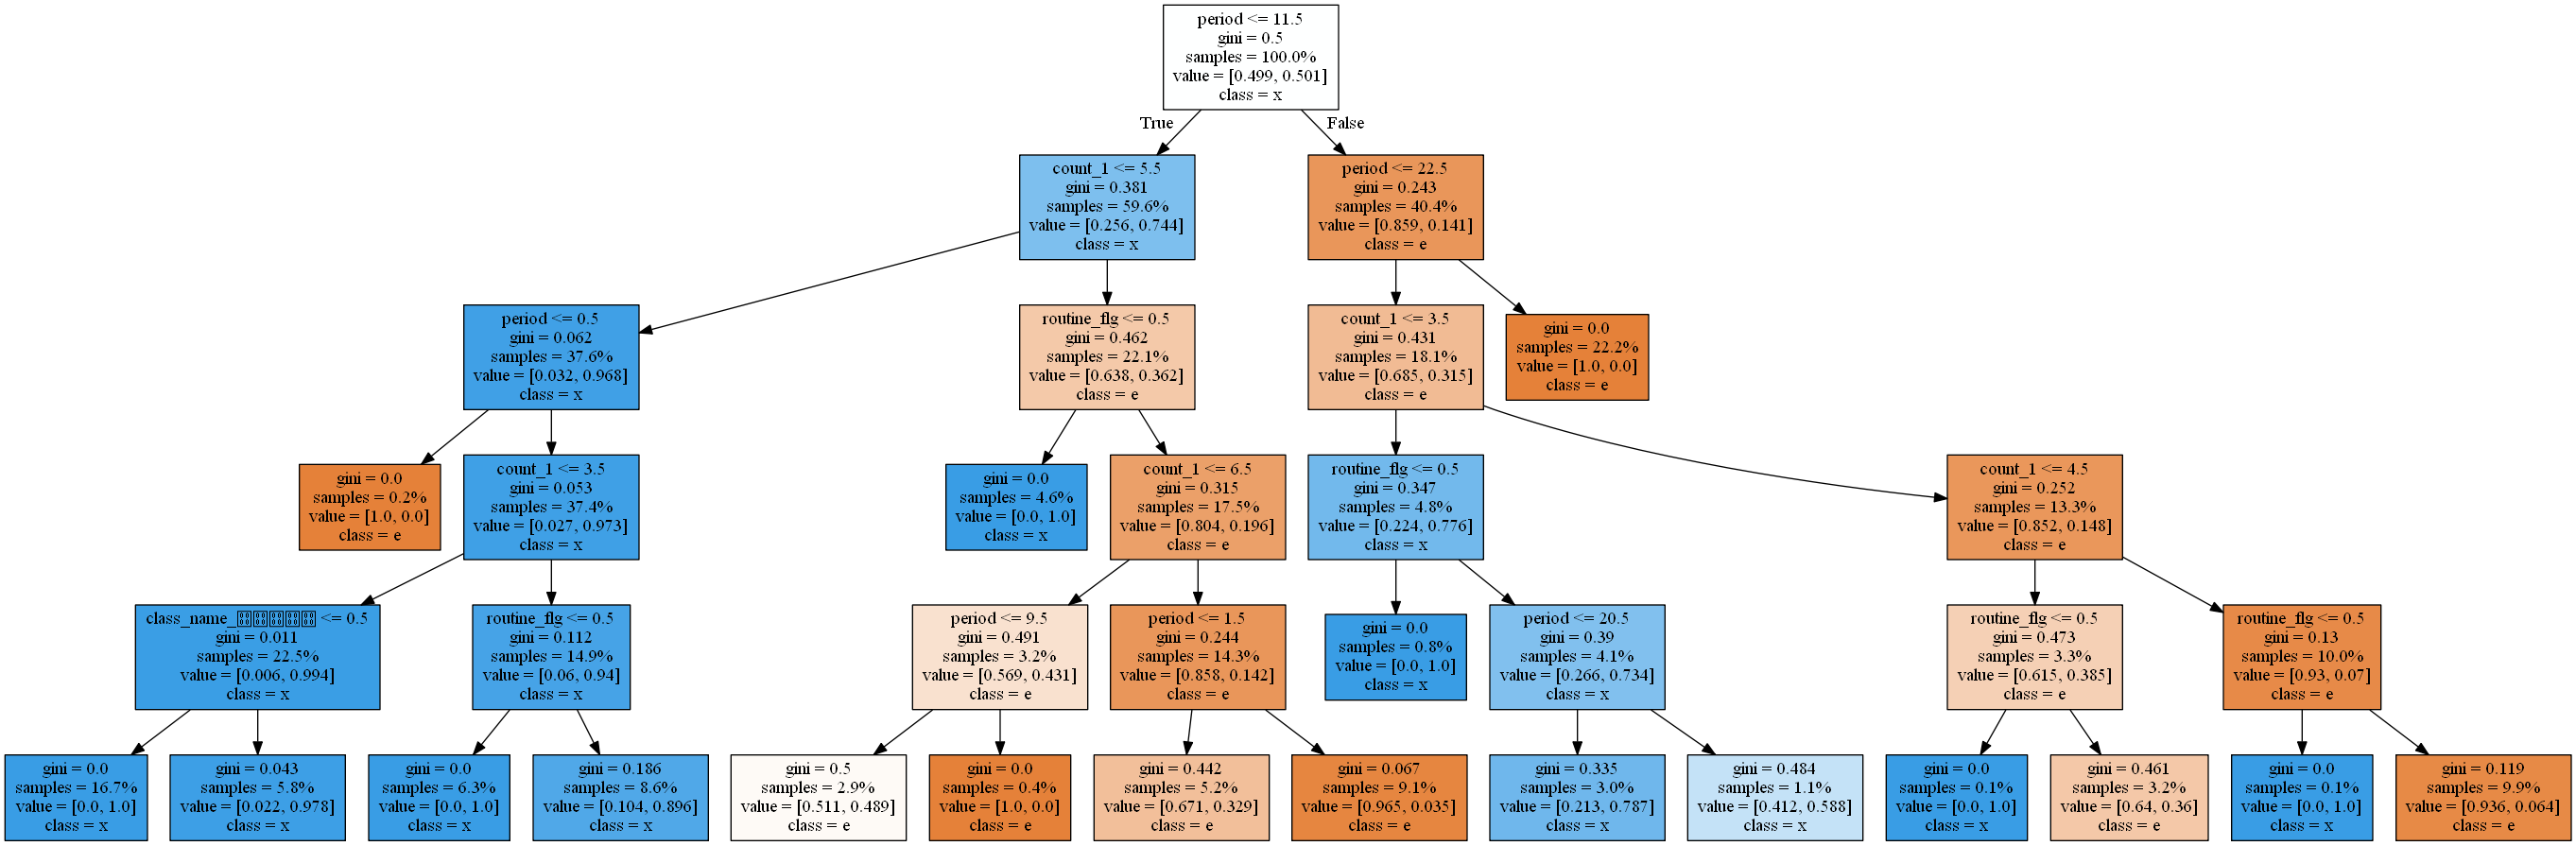

In [116]:
dot_data = tree.export_graphviz(
    model,
    out_file = None,
    feature_names = X.columns,
    class_names = 'exit',
    filled = True,
    proportion = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# ノック50 : 予測

In [133]:
count_1 = 3
routine_flg = 1
period = 10
campaign_name = '入会費無料'
class_name = 'オールタイム'
gender = 'M'

In [134]:
if campaign_name == "入会費半額":
    campaign_name_list = [1, 0]
elif campaign_name == "入会費無料":
    campaign_name_list = [0, 1]
elif campaign_name == "通常":
    campaign_name_list = [0, 0]
if class_name == "オールタイム":
    class_name_list = [1, 0]
elif class_name == "デイタイム":
    class_name_list = [0, 1]
elif class_name == "ナイト":
    class_name_list = [0, 0]
if gender == "F":
    gender_list = [1]
elif gender == "M":
    gender_list = [0]

In [135]:
input_data = [count_1, routine_flg, period]
input_data.extend(campaign_name_list)
input_data.extend(class_name_list)
input_data.extend(gender_list)

In [136]:
input_data

[3, 1, 10, 0, 1, 1, 0, 0]

In [137]:
print(model.predict([input_data]))
print(model.predict_proba([input_data]))

[1.]
[[0.00273973 0.99726027]]
